<a href="https://colab.research.google.com/github/arpitttiwari/NanyangTechnicalUniversity/blob/main/Notebook_2_loan_approvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading libraries and data

Here we load the necessary libraries. Note that while `pandas`, `numpy`, `sklearn`, `statsmodels` come with Anaconda distribution, you will probably have to install `stargazer` (for printing regression tables) and `plotly` (data visualization) manually.

In [ ]:
#@title
# This is to install missing packages - comment it out if not needed
!pip install stargazer
!pip install plotly
# You can comment it out later

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd  
import numpy as np  

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats as st

from stargazer.stargazer import Stargazer, LineLocation
import plotly.express as px

# Notebook 2: logistic regression

Go through the notebook and do exercises. There will be topics for discussion in the end - we will discuss them in the end of the class or tomorrow

By the end of this activity, you should 

1. Learn how to train and evaluate a logistic regression model

2. Explain how to recognize overfitting

3. Explain importance of variable selection

Here we load the German credit approval dataset.

Here is the source of the data:
https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


And here is the description:

### Attribute 1: (qualitative)
Status of existing checking account

A11 : ... < 0 DM

A12 : 0 <= ... < 200 DM

A13 : ... >= 200 DM / salary assignments for at least 1 year

A14 : no checking account

### Attribute 2: (numerical)
Duration in month

### Attribute 3: (qualitative)
Credit history

A30 : no credits taken/ all credits paid back duly

A31 : all credits at this bank paid back duly

A32 : existing credits paid back duly till now

A33 : delay in paying off in the past

A34 : critical account/ other credits existing (not at this bank)

### Attribute 4: (qualitative)
Purpose

A40 : car (new)

A41 : car (used)

A42 : furniture/equipment

A43 : radio/television

A44 : domestic appliances

A45 : repairs

A46 : education

A47 : (vacation - does not exist?)

A48 : retraining

A49 : business

A410 : others

### Attribute 5: (numerical)
Credit amount

### Attibute 6: (qualitative)
Savings account/bonds

A61 : ... < 100 DM

A62 : 100 <= ... < 500 DM

A63 : 500 <= ... < 1000 DM

A64 : .. >= 1000 DM

A65 : unknown/ no savings account


### Attribute 7: (qualitative)
Present employment since

A71 : unemployed

A72 : ... < 1 year

A73 : 1 <= ... < 4 years

A74 : 4 <= ... < 7 years

A75 : .. >= 7 years

### Attribute 8: (numerical)
Installment rate in percentage of disposable income

### Attribute 9: (qualitative)
Personal status and sex

A91 : male : divorced/separated

A92 : female : divorced/separated/married

A93 : male : single

A94 : male : married/widowed

A95 : female : single

### Attribute 10: (qualitative)
Other debtors / guarantors

A101 : none

A102 : co-applicant

A103 : guarantor

### Attribute 11: (numerical)
Present residence since

### Attribute 12: (qualitative)
Property

A121 : real estate

A122 : if not A121 : building society savings agreement/ life insurance

A123 : if not A121/A122 : car or other, not in attribute 6

A124 : unknown / no property

### Attribute 13: (numerical)
Age in years

### Attribute 14: (qualitative)
Other installment plans

A141 : bank

A142 : stores

A143 : none

### Attribute 15: (qualitative)
Housing

A151 : rent

A152 : own

A153 : for free

### Attribute 16: (numerical)
Number of existing credits at this bank

### Attribute 17: (qualitative)
Job

A171 : unemployed/ unskilled - non-resident

A172 : unskilled - resident

A173 : skilled employee / official

A174 : management/ self-employed/

highly qualified employee/ officer

### Attribute 18: (numerical)
Number of people being liable to provide maintenance for

### Attribute 19: (qualitative)
Telephone

A191 : none

A192 : yes, registered under the customers name

### Attribute 20: (qualitative)
foreign worker

A201 : yes

A202 : no

-------------------------------

Fedor modified it for convenience. He replaced values of orginal variables with numbers, e.g., Attribute 3 (credit history) from A30, A31, A32, A33, A34, to 0, 1, 2, 3, 4 repsectively. And he replaced values of categorical variables with meaningful descriptions.

In [ ]:
#### Loading data from Google Drive - thanks to ChatGPT
#### https://drive.google.com/file/d/1hZKbzU4SQQNlJxJ9Jn3nt7ICLkSVVISS/view?usp=sharing

import requests
from io import StringIO

# Set the file ID of the CSV file you want to load
file_id = "1hZKbzU4SQQNlJxJ9Jn3nt7ICLkSVVISS"

# Set the URL to download the file using the Drive API
url = f"https://drive.google.com/uc?id={file_id}&export=download"

# Make a GET request to download the file and decode the content
content = requests.get(url).content.decode("utf-8")

# Convert the string content to a pandas dataframe
dataset = pd.read_csv(StringIO(content))
dataset.shape

(1000, 21)

Here is what the data look like. Note that there are categorical, ordinal, and numeric variables.

The response variable, `Y`, takes values in the set $\{\mbox{yes},\mbox{no}\}$.

In [ ]:
dataset.head()

,Checking_account,Duration,Credit_history,Purpose,Amount,Savings_account,Employed_since,Installment_rate,Personal_status,Other_debtors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits,Job,Number_of_dependants,Telephone,Foreign_worker,Y
0,1,6,4,radio/television,1169,0,4,4,male: single,none,...,real estate,67,none,1,2,skilled employee,1,yes,yes,no
1,2,48,2,radio/television,5951,1,2,2,female: divorced/separated/married,none,...,real estate,22,none,1,1,skilled employee,1,none,yes,yes
2,0,12,4,education,2096,1,3,2,male: single,none,...,real estate,49,none,1,1,unskilled,2,none,yes,no
3,1,42,2,furniture/equipment,7882,1,3,2,male: single,guarantor,...,life insurance,45,none,0,1,skilled employee,2,none,yes,no
4,1,24,3,car (new),4870,1,2,3,male: single,none,...,unknown,53,none,0,2,skilled employee,2,none,yes,yes


And some simple description

In [ ]:
dataset.describe()

,Checking_account,Duration,Credit_history,Amount,Savings_account,Employed_since,Installment_rate,Present_residence_since,Age,Housing,Number_of_existing_credits,Number_of_dependants
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.001000,20.903000,2.54500,3271.258000,1.190000,2.384000,2.973000,2.845000,35.546000,1.071000,1.407000,1.155000
std,0.957034,12.058814,1.08312,2822.736876,0.966869,1.208306,1.118715,1.103718,11.375469,0.531264,0.577654,0.362086
min,0.000000,4.000000,0.00000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,0.000000,1.000000,1.000000
25%,0.000000,12.000000,2.00000,1365.500000,1.000000,2.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,1.000000,18.000000,2.00000,2319.500000,1.000000,2.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,2.000000,24.000000,4.00000,3972.250000,1.000000,4.000000,4.000000,4.000000,42.000000,1.000000,2.000000,1.000000
max,3.000000,72.000000,4.00000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,2.000000,4.000000,2.000000


## Data exploration

Below is a scatterplot of the data in the axes (Age, Amount)

In [ ]:
fig = px.scatter(dataset,  x = 'Age', y = 'Amount', color = 'Y')
fig.show()

## Exercise 1

Does "yes" mean that the loan should be approved or does "yes" mean that the customer defaulted on their loan?

In [ ]:
### Write your code here



WRITE YOUR ANSWER HERE

## Training and test datasets

Here we will split the entire dataset into 70% training and 30% test data. We will also convert "yes" and "no" to 1 and 0 respectively - we need it to train our models.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_data, test_data = train_test_split(dataset, test_size=0.3, random_state = 8128)
train_data['Y'] = le.fit_transform(train_data['Y'])
test_data['Y'] = le.fit_transform(test_data['Y'])

print("Entire dataset dimensions =", dataset.shape)
print("Train data dimensions =", train_data.shape)
print("Test data dimensions =", test_data.shape)

Entire dataset dimensions = (1000, 21)
Train data dimensions = (700, 21)
Test data dimensions = (300, 21)


### Exercise 2

Do we have more observations with $Y=\mbox{yes}$ or more ovservations with $Y=\mbox{no}$?

Imagine that instead of training a logistic regression, we will use a super-simple baseline model - always predict that $Y=\mbox{yes}$ or that $Y=\mbox{no}$ (whichever is more common in the training data). What will be the test accuracy of such a baseline model?

In [ ]:
### Update the codes below

fraction_yes = np.sum(train_data['Y'])   # This is incorrect, change it
print("Fraction of observstions with Y = 'yes' in the training set is", np.round(fraction_yes, 2))
mode_val, mode_count = st.mode(train_data['Y'])
baseline_prediction = mode_count[0] # This is incorrect, change it
print("The baseline prediction is", baseline_prediction)
baseline_test_acc = np.mean(0. + (test_data['Y'] == baseline_prediction))
print("Test accuracy of baseline model =", np.round(baseline_test_acc, 2))

Fraction of observstions with Y = 'yes' in the training set is 226
The baseline prediction is 474
Test accuracy of baseline model = 0.0


<ipython-input-9-a2a15f5d33cb>:5: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



## Modelling

Here we train two logistic models. The first one uses just three features as predictors and the second one uses all the available features.

In [ ]:
mod1 = smf.logit(formula = 'Y ~ Age + Amount + Credit_history', data = train_data).fit()

formula = 'Y ~ ' + ' + '.join(train_data.columns.drop('Y'))
mod2 = smf.logit(formula, data = train_data).fit()

stargazer = Stargazer([mod1, mod2])
# We will not report coefficients of the second model since there are too many of them
stargazer

Optimization terminated successfully.
         Current function value: 0.587352
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.476325
         Iterations 7


### Model evaluation 

To evaluate our model, we need some performance metric. Such a performance metric can either show how good a model is (accuracy) or how bad a model is (error or loss function). For classification models, we usually use metrics related to accuracy (accuracy, balanced accuracy, precision, recall, F1-score etc). Here we will just look at the overall accuracy, i.e.,
$$
\frac{\mbox{Number of correctly predicted observations}}{\mbox{Total number of observations}}
$$

Note that the accuracy is not a differentiable function and hence its impossible to use it to train logistic regression by gradient descent. To train logistic regression, we use the binary cross-entropy loss
$$
L(\beta)=-\sum_{i=1}^{N}\left(y^i\log p(x^i)+ (1-y^i)\log(1-p(x^i))\right)
$$
It means that, by definition, model parameters are found as to minimize it, i.e.,
$$
(\beta_0,\beta_1,\dots,\beta_p)=\arg\min L
$$
However, the binary cross-entropy loss is hard to make sense of and hence we usually don't want to use it to evaluate the final model.

First, we will construct predictions of model 1.

In [ ]:
mod1.predict(test_data)

280    0.233627
810    0.318256
447    0.339059
16     0.145291
143    0.380693
         ...   
853    0.407808
871    0.139987
859    0.402956
226    0.648210
196    0.176861
Length: 300, dtype: float64

Note that logistic regression reports probabilities rather than labels. This is actually a good thing because not only it tells us which label it predicts, it also report how confident it is in its predictions. We will just use the standard convention that if the probability is above 0.5, then the predicted label is 1, otherwise it is 0. Here are some predicted labels.

In [ ]:
0. + (mod1.predict(test_data) > 0.5)

280    0.0
810    0.0
447    0.0
16     0.0
143    0.0
      ... 
853    0.0
871    0.0
859    0.0
226    1.0
196    0.0
Length: 300, dtype: float64

Now we are ready to construct predictions and report training and test accuracies of the two models

In [ ]:
pred1_train = 0. + (mod1.predict(train_data) > 0.5)
pred1_test = 0. + (mod1.predict(test_data) > 0.5)

# Note that since we trained the 500-regressor model in a different manner (without the formula API),
# we need to use the predict method in a different way too:
pred2_train = 0. + (mod2.predict(train_data) > 0.5)
pred2_test = 0. + (mod2.predict(test_data) > 0.5)

print("Training accuracy of model 1 =", np.round(metrics.accuracy_score(train_data["Y"], pred1_train), 2))
print("Test accuracy of model 1 =", np.round(metrics.accuracy_score(test_data["Y"], pred1_test), 2))
print("Training accuracy of model 2 =", np.round(metrics.accuracy_score(train_data["Y"], pred2_train), 2))
print("Test accuracy of model 2 =", np.round(metrics.accuracy_score(test_data["Y"], pred2_test), 2))

Training accuracy of model 1 = 0.69
Test accuracy of model 1 = 0.75
Training accuracy of model 2 = 0.77
Test accuracy of model 2 = 0.69


### Exercise 3

Write a Python function with three inputs - a logistic regression model, a dataset, and the name of the column containing the response variable. The output of such a function should be the overall accuracy of the regression model. You will need to modify the following code from Notebook 1 to do that:

In [ ]:
# Modify this code

def model_acc(model, data = test_data, y = 'Y'):
    pred = 0. * (model.predict(data) > 0.5) # change this line to a correct one
    return metrics.accuracy_score(data[y], pred)

print("Test accuracy of model 1 =", np.round(model_acc(mod1), 2))
print("Test accuracy of model 2 =", np.round(model_acc(mod2), 2))

Test accuracy of model 1 = 0.75
Test accuracy of model 2 = 0.75


## Exercise 4

Look at the baseline model again. Is the logistic regression better than the baseline model? 

In [ ]:
### WRITE YOUR CODE HERE

## Decision Tree

Here is how we train and plot an individual decision **tree**

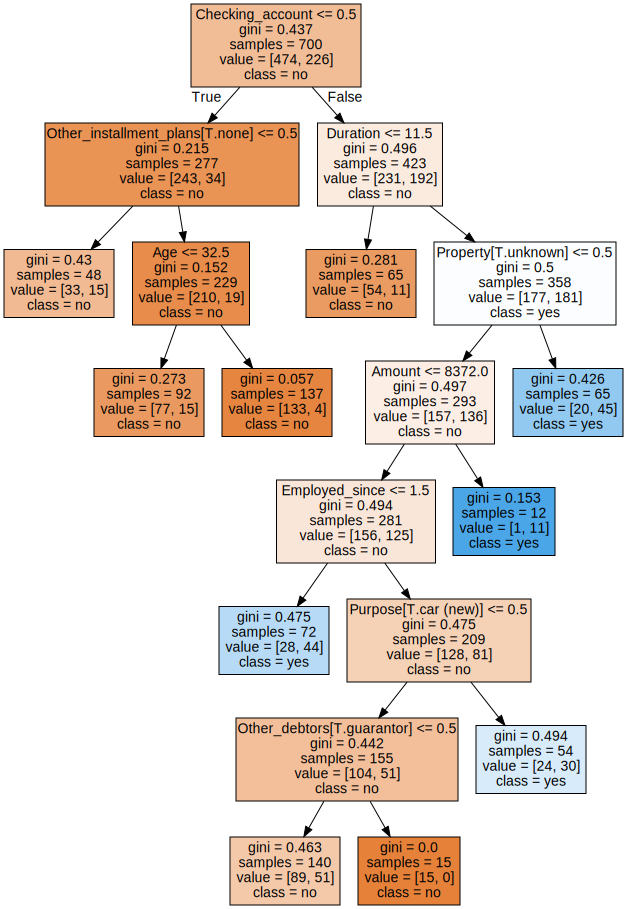

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from patsy import dmatrices
import graphviz

# Prepare the data using the formula API and dmatrices function
formula = 'Y ~ ' + ' + '.join(train_data.columns.drop('Y'))
Y_train, X_train = dmatrices(formula, data=train_data, return_type='dataframe')

# train the decision tree model
mod_tree = DecisionTreeClassifier(min_samples_split=150) # you can change the number 150 to a smaller number - then the tree will become bigger
mod_tree.fit(X_train, Y_train)

# plot the decision tree
dot_data = tree.export_graphviz(mod_tree, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=["no", "yes"],
                                filled=True)


graph = graphviz.Source(dot_data, format="png") 
graph

# Random Forest

Here we quickly train a simple random forest

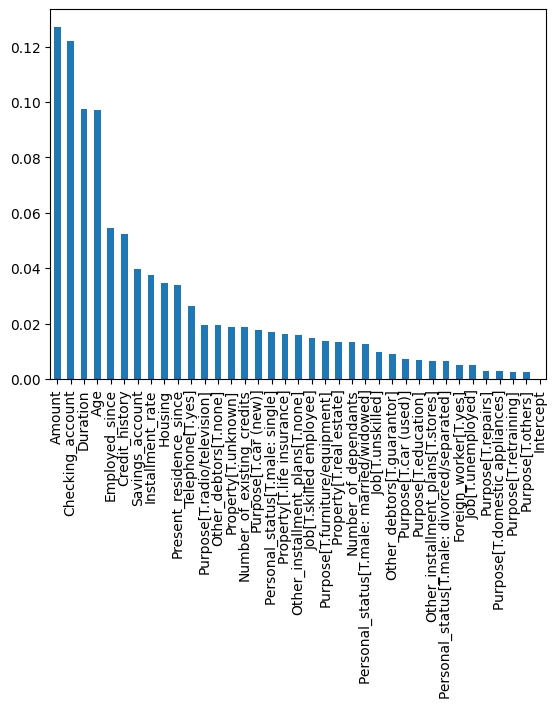

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# fit the model to the data
rf_model.fit(X_train, Y_train.values.ravel())

# plot feature importances
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.design_info.column_names).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## Exercise 5

What is training accuracy and the test accuracy of random forest?

In [ ]:
Y_test, X_test = dmatrices(formula, test_data, return_type='dataframe')

def rf_acc(model, data_x, data_y):
    pred = 1. + (model.predict(data_x) > 0.5) # change this code to a correct one
    return metrics.accuracy_score(data_y, pred)


print("Test accuracy of random forest =", np.round(rf_acc(rf_model, X_test, Y_test), 2))
print("Training accuracy of random forest =", np.round(rf_acc(rf_model, X_train, Y_train), 2))

Test accuracy of random forest = 0.14
Training accuracy of random forest = 0.01


## Question to think about

We will discuss them in the end of the class

### Question 1 - two logistic regressions

Why do you think the second logistic model appears to be more accurate on the training data but less accurate on the test data? What do we do to prevent such a situation?

### Question 2 - variable selection

Our experiments show that we can try models with a different number of features and it is important to choose features wisely. What do you think of the following way to do it?

We will train logistic regressions $f(X_1), f(X_1,X_2), f(X_1,X_2,X_3),\ldots, f(X_1,X_2,\dots,X_{20})$ . Every one of them will be trained on the train data and but we will use the test accuracy to evaluate its performance. Then we will choose the model with the highest test accuracy.

Is it a correct way to choose the right number of features?

## Question 3

Train your favourite model to predict loan approval and compare its accuracy to results reported in "Credit Scoring Models Using Ensemble Learning and Classification Approaches: A Comprehensive Survey"

## Model answers

Fedor's answers to exercises are available here:

https://colab.research.google.com/drive/1mASqipULLdSOZ42-6mwqNy85_JM2CRYu?usp=sharing